In [1]:
!pip install tensorflow
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
from tensorflow.keras.callbacks import EarlyStopping

In [4]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [5]:
class_name = ['airplane',
'automobile','bird','cat','deer','dog','frog','horse','ship','truck',]

In [6]:
y_train[1][0]

9

In [7]:
class_name[y_train[1][0]]

'truck'

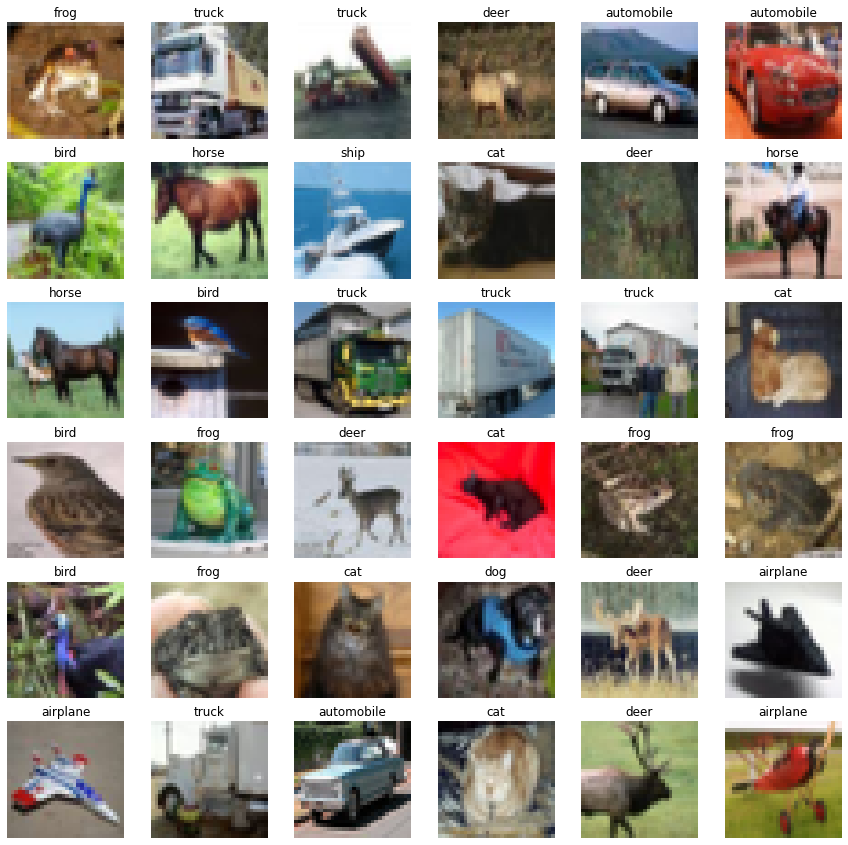

In [8]:
plt.figure(figsize=(15,15))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.axis("off")
    plt.imshow(x_train[i])
    target = y_train[i][0]
    plt.title(class_name[target])
    
plt.show()

In [9]:
x_train=x_train/255.0
x_test=x_test/255.0

In [10]:
x_train.shape

(50000, 32, 32, 3)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation ,Conv2D ,MaxPool2D , Flatten , Dropout


In [12]:
model = Sequential()

model.add(Conv2D(input_shape=(32,32,3),filters=64 , kernel_size=(3,3)))


In [13]:
model.add(Activation('relu'))


In [14]:
model.add(MaxPool2D())

In [15]:
model.add(Flatten())

In [16]:
model.add(Dense(units=512, activation = 'relu'))
model.add(Dense(units=256, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(units=10, activation = 'softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=["sparse_categorical_crossentropy"])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 64)        1792      
_________________________________________________________________
activation (Activation)      (None, 30, 30, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 14400)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               7373312   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0

In [18]:
early_stopping = EarlyStopping(monitor='val_loss',mode = 'min',verbose=1,patience=3)

In [19]:
model.fit(x_train,y_train,validation_split=0.3 , epochs=32, callbacks=[early_stopping])

Epoch 1/32
1094/1094 [==============================] - 73s 67ms/step - loss: 1.5016 - sparse_categorical_crossentropy: 1.5016 - val_loss: 1.3252 - val_sparse_categorical_crossentropy: 1.3252
Epoch 2/32
1094/1094 [==============================] - 71s 65ms/step - loss: 1.1356 - sparse_categorical_crossentropy: 1.1356 - val_loss: 1.1657 - val_sparse_categorical_crossentropy: 1.1657
Epoch 3/32
1094/1094 [==============================] - 72s 65ms/step - loss: 0.9379 - sparse_categorical_crossentropy: 0.9379 - val_loss: 1.1262 - val_sparse_categorical_crossentropy: 1.1262
Epoch 4/32
1094/1094 [==============================] - 72s 66ms/step - loss: 0.7641 - sparse_categorical_crossentropy: 0.7641 - val_loss: 1.0779 - val_sparse_categorical_crossentropy: 1.0779
Epoch 5/32
1094/1094 [==============================] - 72s 66ms/step - loss: 0.5968 - sparse_categorical_crossentropy: 0.5968 - val_loss: 1.1582 - val_sparse_categorical_crossentropy: 1.1582
Epoch 6/32
1094/1094 [==================

In [20]:
loss =pd.DataFrame(model.history.history)

In [21]:
predicitons = np.argmax(model.predict(x_test),axis=1)

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predicitons,target_names=class_name))

              precision    recall  f1-score   support

    airplane       0.70      0.64      0.67      1000
  automobile       0.74      0.77      0.76      1000
        bird       0.52      0.49      0.50      1000
         cat       0.44      0.47      0.45      1000
        deer       0.62      0.51      0.56      1000
         dog       0.52      0.55      0.53      1000
        frog       0.71      0.72      0.71      1000
       horse       0.73      0.64      0.68      1000
        ship       0.75      0.77      0.76      1000
       truck       0.63      0.79      0.70      1000

    accuracy                           0.63     10000
   macro avg       0.64      0.63      0.63     10000
weighted avg       0.64      0.63      0.63     10000



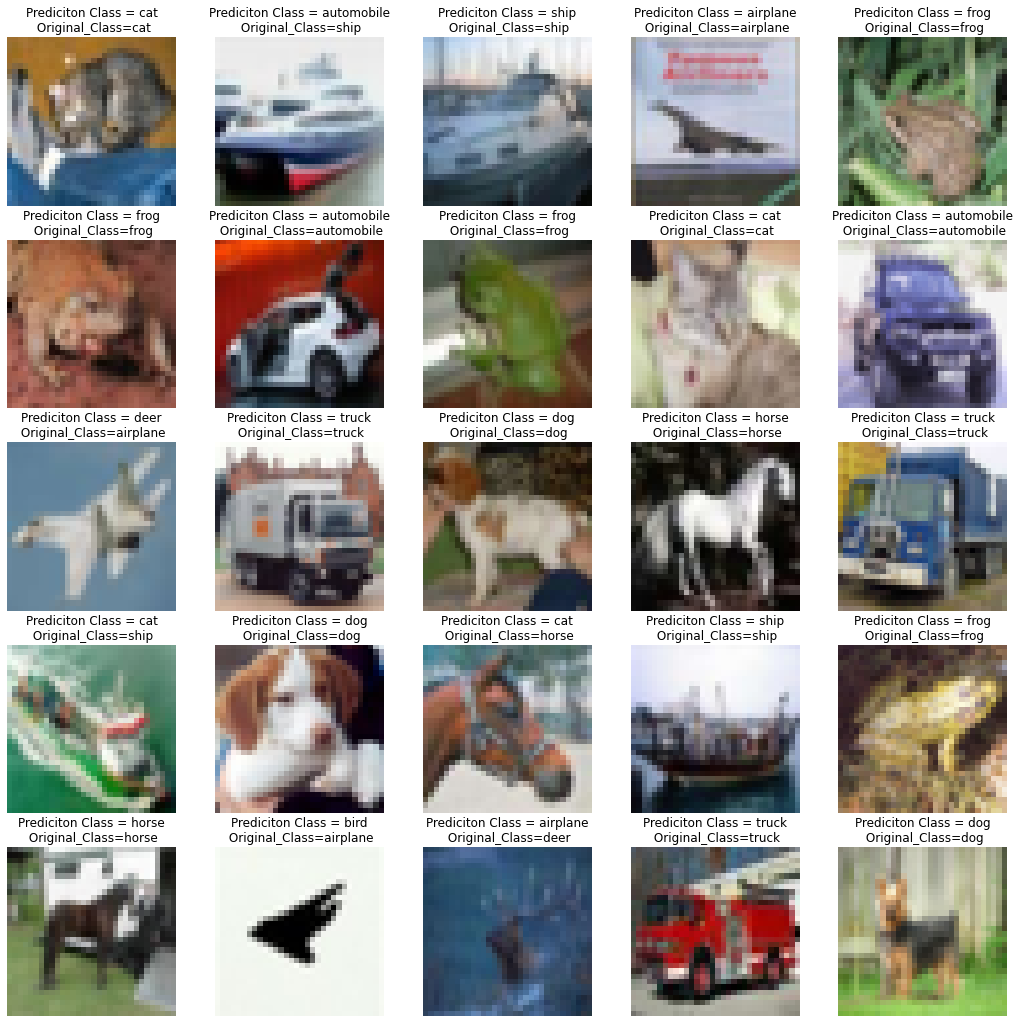

In [23]:
plt.figure(figsize=(18,18))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.axis('off')
    plt.imshow(x_test[i])
    plt.title(f'Prediciton Class = {class_name[predicitons[i]]}\n Original_Class={class_name[y_test[i][0]]}')
    
plt.show()